# Navigation -- Agent 007 Training

---

In this notebook, Agent 007 will learn to collect yellow bananas in the Unity ML-Agents environment provided in the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Load packages

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the Udacity project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from collections import deque
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

### 2. The Environment and Agent classes

We also import two classes, one for the environment, and one for the agent

In [2]:
# load the Unity environment wrapper class
from environment import Environment

# load the Agent class
from dqn_agent import Agent

### 3. The Deep Q-Network (DQN) Algorithm

We will use the DQN algrithm to train Agent 007

In [3]:
# The Deep Q-Network (DQN) Algorithm

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning algorithm.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'agent_007_weights.pth')
            break
    torch.save(agent.qnetwork_local.state_dict(), 'agent_999_weights.pth')
    return scores

### 3. Initiallizing the Environment and Agent

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

**_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = Environment(file_name="Banana.app")
```

In [4]:
# Find the full filename to the Unity environment file
path = !pwd
filename = path[0] + "/Banana.app"

In [5]:
# Initiate the environment
env = Environment(filename, train_mode=True, no_graphics=True, seed=0)
state = env.reset()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [6]:
# Initiate the agent
agent = Agent(state_size=env.state_size, action_size=env.action_size, seed=0)

### 4. Agent 007 goes training at bootcamp

Time has come for Agent 007 to do his pushups and learn how to collect as many as possible yellow bananas ! 

Episode 100	Average Score: 0.92
Episode 200	Average Score: 4.13
Episode 300	Average Score: 7.36
Episode 400	Average Score: 10.22
Episode 500	Average Score: 13.00
Episode 600	Average Score: 14.72
Episode 693	Average Score: 15.00
Environment solved in 593 episodes!	Average Score: 15.00


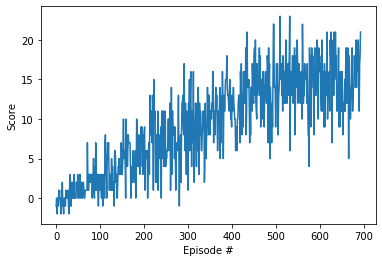

In [7]:
# Set how many pushups you want Agent 007 to do during boot camp
n_episodes = 2500

# run the Deep Q-Network algorithm
scores = dqn(n_episodes=n_episodes)

# close the environment
env.close()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()